# Mini Project 1: COMP 551 project - Red Wine Dataset

### by GROUP 97 (Nikhil Podila, Shantanil Bagchi and Surya Penmesta)

Dataset 1 (Wine Quality):

Link:https://archive.ics.uci.edu/ml/datasets/Wine+Quality

This is a dataset where the goal is to predict the quality of wine based on its chemical properties.

Note: We will only be using the red wine subset of the data.This data contains quality ratings from 0-10. We will convert this task to a binary classification by defining the ratings of 6,7,8,9,10 as positive (i.e., 1) and all other ratings as negative (i.e., 0).

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Task 1: Acquire, preprocess, and analyze the data

The essential subtasks for this part of the project are:
1. Download the datasets (noting the correct subsets to use, as discussed above).
2. Load the datasets into numpy objects (i.e., arrays or matrices) in Python. Remember to convert the wine dataset
to a binary task, as discussed above.
3. Clean the data. Are there any missing or malformed features? Are there are other data oddities that need to be
dealt with? You should remove any examples with missing or malformed features and note this in your
report.
4. Compute some statistics on the data. E.g., what are the distributions of the positive vs. negative classes, what
are the distributions of some of the numerical features?

### Reading Dataset: Red Wine Quality

In [2]:
# Load the Red Wines dataset
data = pd.read_csv("winequality-red.csv", sep=';')

# Display first few records
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


### Removing outlier data
Using Interquartile range to calculate and remove outliers

In [3]:
# Removing outliers from quality column. Find data points with extreme high or low values
feature = "quality"

# Calculate the 25th and 75th percentile of the column
Q1, Q3 = np.percentile(data[feature], q=25), np.percentile(data[feature], q=75) 

# Select and Calculate outlier range using interquartile range
outlier_range = 1.5 * (Q3 - Q1)

# Outliers in data
num_data = data[((data["quality"] < (Q1 - outlier_range)) | (data["quality"] > (Q3 + outlier_range)))].shape[0]

# Remove outliers outside the outlier range
data = data[~((data["quality"] < (Q1 - outlier_range)) | (data["quality"] > (Q3 + outlier_range)))].reset_index(drop = True)

# Display number of outliers
print("Number of outliers removed: ", num_data)

Number of outliers removed:  28


### Update target variable from Numeric to Categorical

In [4]:
# Change values in the Quality column as per requirement
data["quality"] = 1*(data["quality"]>5)

# Diaplay the changed records
data[["quality"]].head()

,quality
0,0
1,0
2,0
3,1
4,0


### Checking number of total wine data and percentage of good wine 

In [5]:
#Check number of entries in a cloumn
number_of_wines = data.shape[0]

# Number of wines with quality {6,7,8,9,10}
wine_quality_good = data.loc[(data['quality'] == 1)] #Accessing Column using label
number_of_good_wine = wine_quality_good.shape[0] #Returns Dimensionality of DataFrame in tuple format

# Number of wines with quality below 5
wine_quality_notgood = data.loc[(data['quality'] == 0)]
number_of_notgood_wine = wine_quality_notgood.shape[0]

# Percentage of wines with good quality
good_wine_percentage = number_of_good_wine*100/number_of_wines

# Print the results
print("Total number of wine: {}".format(number_of_wines))
print("Wines with rating 6 and above: {}".format(number_of_good_wine))
print("Wines with rating less than 5: {}".format(number_of_notgood_wine))
print("Percentage of wines with quality 6 and above: {:.2f}%".format(good_wine_percentage))

Total number of wine: 1571
Wines with rating 6 and above: 837
Wines with rating less than 5: 734
Percentage of wines with quality 6 and above: 53.28%


### Plotting Pie Chart to show distribution of positive and negative classes

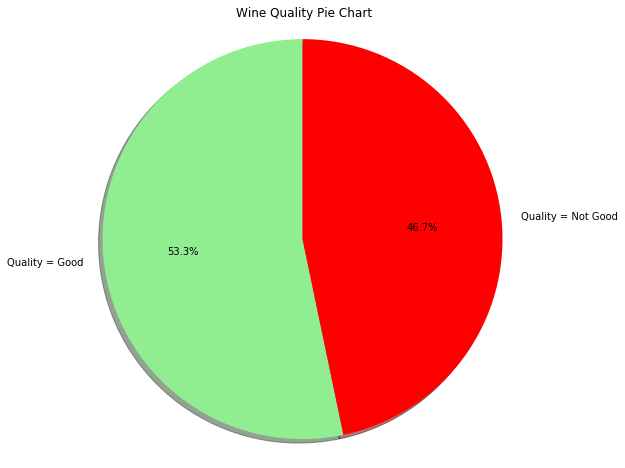

In [6]:
# Data to plot
plt.figure(figsize = (8,8))
labels = 'Quality = Good', 'Quality = Not Good'
plt.title('Wine Quality Pie Chart')
sizes = [number_of_good_wine, number_of_notgood_wine]
colors = ['lightgreen', 'red']

# Plot pie chart
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

### Understanding Individual Distributions

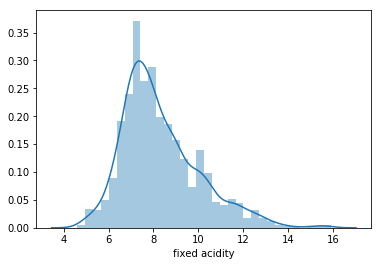

In [7]:
sns.distplot(data['fixed acidity'])

#### The Fixed acidity value seems to display a normal distribution with major samples exhibiting values between 6.5 g/dm3 to 9.2 g/dm3

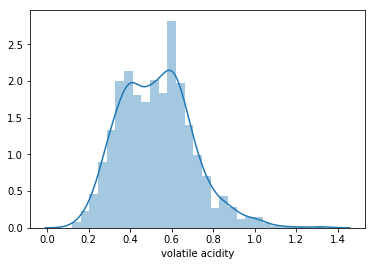

In [8]:
sns.distplot(data['volatile acidity'])

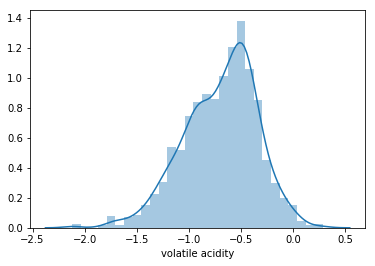

In [9]:
sns.distplot(np.log(data['volatile acidity']))

#### The Volatile acidity value seems to display  major samples exhibiting values between 0.25g/dm3 to 0.79g/dm3 but on taking the log distribution the plot becomes normal distributed.

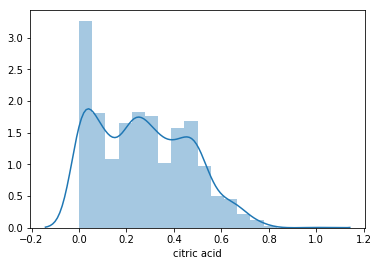

In [10]:
sns.distplot(data['citric acid'])

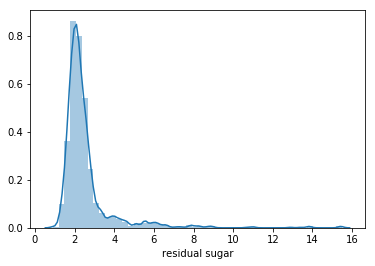

In [11]:
sns.distplot(data['residual sugar'])

#### The histogram is highly left skewed. There are very less wine samples with residual sugar more than 8.

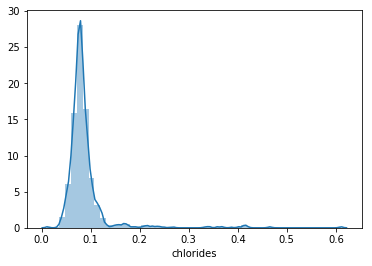

In [12]:
sns.distplot(data['chlorides'])

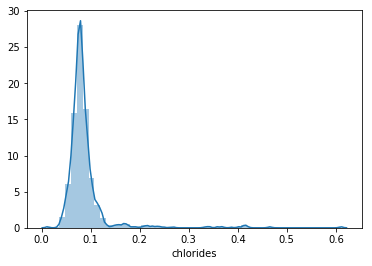

In [13]:
sns.distplot(data['chlorides'])

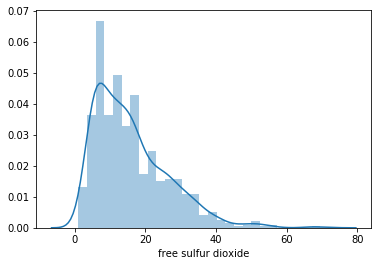

In [14]:
sns.distplot(data['free sulfur dioxide'])
#Most of the free sulfur dioxide seems to be between the 1-40.

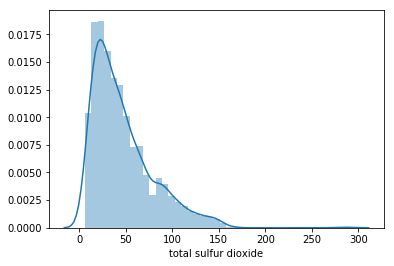

In [15]:
sns.distplot(data['total sulfur dioxide'])
#Most of the total sulfur dioxide seems to a have a spread between 0 and 150

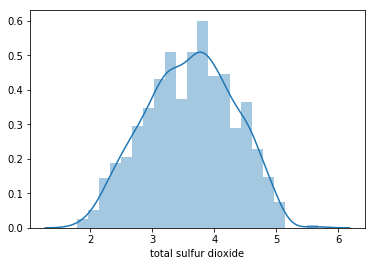

In [16]:
sns.distplot(np.log(data['total sulfur dioxide']))

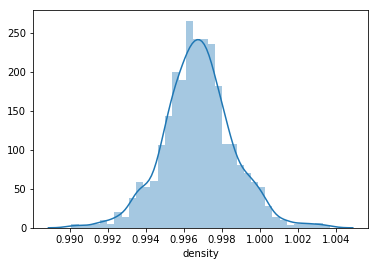

In [17]:
sns.distplot(data['density'])

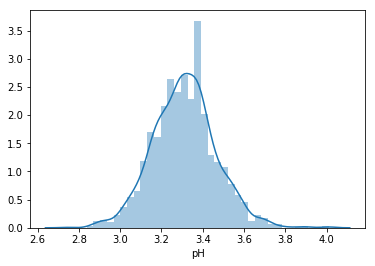

In [18]:
sns.distplot(data['pH'])
#pH distrbution seems to be normally distributed with major samples exhibiting values between 3.0 and 3.5.

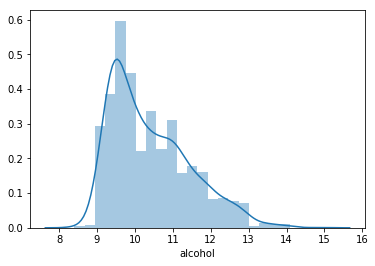

In [19]:
sns.distplot(data['alcohol'])
#The alcohol content seems to vary from 8 to 14 with most of data around 9-10

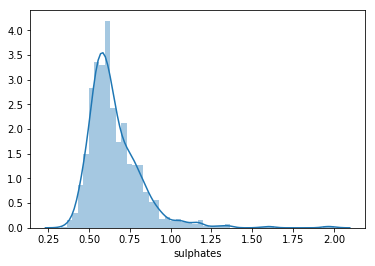

In [20]:
sns.distplot(data['sulphates'])

### Summarizing features in the data

In [23]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000,1571.000000
mean,8.316550,0.526747,0.270236,2.537747,0.087461,15.935710,46.754297,0.996760,3.311063,0.657454,10.406811,0.532782
std,1.737278,0.175616,0.193916,1.412038,0.047075,10.451785,32.981568,0.001874,0.153738,0.169787,1.049836,0.499083
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.095000,1.900000,0.070000,7.500000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.100000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,22.000000,63.000000,0.997835,3.400000,0.730000,11.083333,1.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


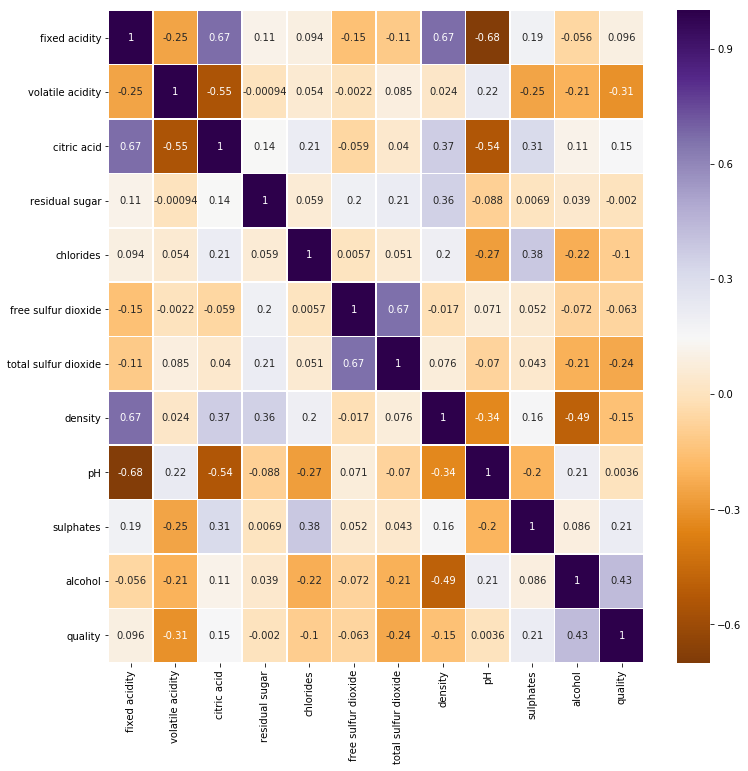

In [24]:
# Sample correlations using Seaborn heatmap
correlation = data.corr()
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0.5, linecolor="white",vmin=-0.7, cmap="PuOr")

### Correlation matrix output shows following behaviour:

#### Fixed Acidity
It shows positive correlation with citric acid which is true since citric acid is one of the fixed acid. It also shows positive correlation with density.
It also shows significant negative correlation with pH and volatile acidity.
#### Volatile Acidity
It is highly negatively correlated with citric acid and quality.
#### Free SO2
It shows significant positive correlation with total SO2, and very less correlation with sulphates.
#### Density
Significant negative correlation is observed with alcohol, acidity (fixed and citric acid) and pH.
#### Quality
Quality and alcohol is positively correlated along with negative correlation with volatile acidity.

Also from above scatterplot matrix, chlorides and sulphates doesn’t seem to have any kind of effect to quality

### Correlation between Alcohol and Quality

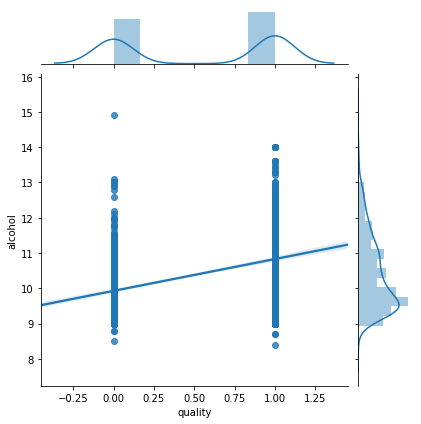

In [25]:
#Visualize the correlation between alcohol and quality
fixedAcidity_pH = data[['alcohol', 'quality']]
gridA = sns.JointGrid(x="quality", y="alcohol", data=fixedAcidity_pH, size=6)
gridA=gridA.plot(sns.regplot, sns.distplot)

### Correlation between pH and fixed acidity

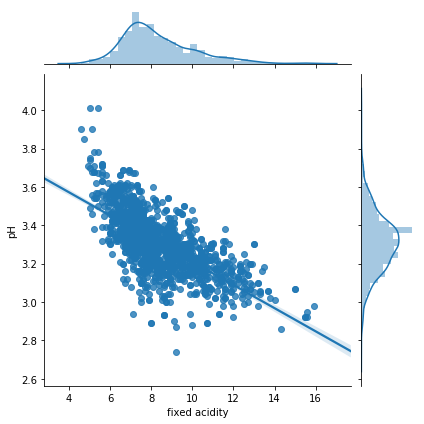

In [26]:
#Visualize the correlation between pH and fixed Acidity
fixedAcidity_pH = data[['pH', 'fixed acidity']]
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixedAcidity_pH, size=6)
gridA=gridA.plot(sns.regplot, sns.distplot)

### Split data into Training set and Testing set

In [27]:
# Train Test split

# Select 80% for training
data_train = data.sample(frac = 0.8)
x_train = np.array(data_train.iloc[:, :-1])
y_train = np.array(data_train["quality"])

# Select rest of data for testing
data_test = data.drop(data_train.index)
x_test = np.array(data_test.iloc[:, :-1])
y_test = np.array(data_test["quality"])

# Show number of training and testing data points
print("Number of Training data points: ", len(x_train))
print("Number of Testing data points: ", len(x_test))

Number of Training data points:  1257
Number of Testing data points:  314


# Task 2:  Implementing the models

### Implementation - Logistic regression using gradient descent

In [28]:
# Compute sigmoid over a matrix of values (element wise)
sigma = lambda y: np.array(list(map(lambda x: 1/(1+np.exp(-x)), y)))

'''
LogisticRegression Class:
This class implements logistic regression model with following attributes and methods:
  Attributes:
    1. Weights matrix
    2. Mean of Training data
    3. Standard Deviation of Training data
  Methods:
    1. __init__: Initialize weights matrix
    2. normalize_data: Normalizes data using Training data's mean and standard deviation
    3. fit: Perform training on Train dataset.
    4. predict: Perform testing using Test dataset 
'''
class LogisticRegression:
    
    def __init__(self, initial_weights):
        '''
        Constructor
         Inputs: Initial weights
        '''
        
        self.w = initial_weights
        self.x_train_mean = np.nan
        self.x_train_std = np.nan
        pass
    
    
    def normalize_data(self, x, from_train = False):
        '''    
        Function to Normalize data
         Inputs:
          x: Input data (Training or Testing dataset)
          from_train: If called from training code (True), the mean and Standard Deviation are noted for use with Test data.
         Outputs:
          Normalized data
        '''
        
        # Save Training mean and SD.
        # Test data must be normalized using Training Mean and Training SD,
        # because of the i.i.d assumption
        if from_train:
            self.x_train_mean = np.mean(x, axis = 0)
            self.x_train_std = np.std(x,axis = 0)
        
        # Return normalized values
        return (x - self.x_train_mean)/self.x_train_std
    
    
    def fit(self, x_train, y_train, alpha, iters, stop_criteria, normalize = True):
        '''    
        Function to perform Training
         Inputs: 
          x_train: Training data - input features
          y_train: Training data - targets
          alpha: Learning rate
          iters: Maximum number of Iterations if not converged
          stop_criteria: Lowest allowed norm of "change in weights" (Stopping criteria)
          normalize: should data be normalized?
         Output:
          List of cross entropy losses

        '''
        
        # Normalize data if requested. Save the Training mean and SD
        if normalize:
            x_train = self.normalize_data(x_train, from_train = True)
        
        # Convert y_train to 2D matrix
        y_train = y_train[np.newaxis]
        
        # Maintain a list of cross entropy losses
        ce_losses = []
        
        # Small value to prevent Log(0) situation
        epsilon = 1e-8
        
        # Iterations of Weight updates
        for iterate in range(iters):
            
            # Cross Entropy calculation
            ce = -1*(\
                     y_train.dot(np.log(sigma(self.w.T.dot(x_train.T)).T+epsilon)) + \
                     (1 - y_train).dot(np.log(1-sigma(self.w.T.dot(x_train.T)).T+epsilon))\
                    )
            
            # Gradient calc - Change in weights
            deltaW = x_train.T.dot((y_train - sigma(self.w.T.dot(x_train.T))).T)
            
            # Update list of losses
            ce_losses = ce_losses + ce.flatten().tolist()
            
            # Weight update equation
            self.w += alpha*deltaW
            
            # Check if norm of deltaW is lower than stopping criteria
            # if yes, stop
            if np.linalg.norm(deltaW) < stop_criteria:
                print("Number of iterations: ", iterate)
                break
        return ce_losses

    
    def predict(self, x_test, normalize = True):
        '''
        Function to predict classes using given input features
         Inputs:
          x_test: Test dataset input features
          normalize: Should data be normalized?
         Outputs:
          y_pred: Predicted classes corresponding to input records
        '''
        
        if normalize:
            x_test = self.normalize_data(x_test)
        
        # Calculate predicted class
        y_pred = 1*(self.w.T.dot(x_test.T) > 0.5)
        
        return y_pred
    
# Function to evaluate accuracies
def evaluate_acc(y_test, y_pred):
    return np.mean(y_test == y_pred)

### Results of LR on test dataset

In [29]:
# Initializing weights
w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T

# Performing logistic regression training
reg = LogisticRegression(w)
f = reg.fit(x_train,y_train,0.001,2000, 0.0001)

# Predicting results on test dataset
y_pred = reg.predict(x_test)

# Evaluating accuracy
lr_init_features = evaluate_acc(y_test, y_pred)*100
print("Accuracy of LR on test dataset: ",lr_init_features, "%")

Number of iterations:  732
Accuracy of LR on test dataset:  67.51592356687898 %


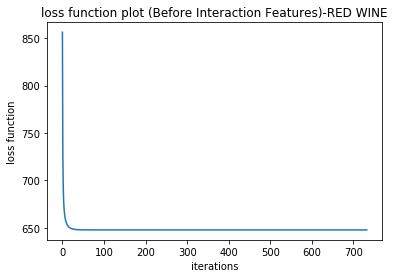

In [30]:
# Plot Cross Entropy loss from validation on Test dataset
plt.title('loss function plot (Before Interaction Features)-RED WINE')
plt.xlabel('iterations'), plt.ylabel('loss function')
plt.plot(f)
plt.show()

###  Linear discriminant analysis

In [31]:
# Implementation of LDA in a class
class LDA():
    """
    Class to that implements LDA from scratch
    """
    
    def __init__(self):
        """
        Initializing the required libraries to null.
        """
        pass
    
    def fit(self, x_train, y_train, alpha=None, iters=None, stop_criteria=None):
        """
        Function learns the parameters of the LDA model.
        Input features: x_train, input labels: y_train
        """
        self.Py0 = np.sum(y_train==0)/y_train.shape[0]
        self.Py1 = np.sum(y_train==1)/y_train.shape[0]
        self.mu0 = x_train.T @ (y_train==0) / np.sum(y_train==0)
        self.mu1 = x_train.T @ (y_train==1) / np.sum(y_train==1)
        self.sigma = np.zeros((x_train.shape[1], x_train.shape[1]))
        
        for i in range(x_train.shape[0]):
            self.sigma = self.sigma + (y_train[i]==0) * np.outer(x_train[i]-self.mu0,x_train[i]-self.mu0)
            self.sigma = self.sigma + (y_train[i]==1) * np.outer(x_train[i]-self.mu1,x_train[i]-self.mu1)
        self.sigma = self.sigma / (y_train.shape[0]-2)
        
        pass
    
    def predict(self, Xtest):
        """
        Function that takes training features as input
        """
        self.w0 = np.log(self.Py1) - np.log(self.Py0) \
             + 0.5 * (np.expand_dims(self.mu0, axis=1).T @ np.linalg.inv(self.sigma) @ np.expand_dims(self.mu0, axis=1)) \
             - 0.5 * (np.expand_dims(self.mu1, axis=1).T @ np.linalg.inv(self.sigma) @ np.expand_dims(self.mu1, axis=1))
        self.w1 = np.linalg.inv(self.sigma) @ (self.mu1-self.mu0)
        y = self.w0 + Xtest @ self.w1
        y = y>0
        return y[0]

### Validation of LDA using Test dataset

In [32]:
# Initialize weights
w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T

# Perform LDA Training
lda = LDA()
f = lda.fit(x_train,y_train)

# Predicting results on test dataset
y_pred = lda.predict(x_test)

# Evaluating accuracy on test dataset
lda_init_features = evaluate_acc(y_test, y_pred)*100
print("Accuracy of LDA on test dataset: ", lda_init_features, "%")

Accuracy of LDA on test dataset:  72.29299363057325 %


# Task 3: Running the experiments

### Implementing k-fold cross validation

In [33]:


# Example usage of cross_validation:
#   cross_validation(Reg, 4, x_train, y_train, 0.003, 200)

def cross_validation(Reg, k, x_train, y_train, alpha=None, iters=None, stop_criteria=None):
    """
    To perform cross validation
     Inputs:
        Reg : Regressor term
        k : Number of folds
        x_train : Training input data
        y_train : Training target data
        alpha : For Logistic Regression, Learning rate. Otherwise None.
        iters: For Logistic Regression, Number of iterations. Otherwise None.
        stop_criteria: For Logistic Regression, Stopping criteria. Otherwise None.
     Outputs:
        Accuracy on cross validation
    """
    
    # Number of samples (approx) in each fold
    fold_size = int(len(x_train)/k)
    
    # accuracies from different folds
    cross_validation_accuracies = 0
    
    # Evaluate for each fold
    for fold_number in range(k):
        
        # Index of start of fold
        val_start = fold_number*fold_size
        
        # Index of end of fold
        val_end = val_start + fold_size
        
        # For last fold, consider validation data from start of last fold till end of data 
        # (may include more than approx fold size)
        # For other folds, evaluate from start of the fold
        if fold_number == (k-1):
            # Validation data for last fold
            x_val_fold = x_train[val_start:,:]
            y_val_fold = y_train[val_start:]
            
            # Training data for other folds
            x_train_fold = x_train[:val_start,:]
            y_train_fold = y_train[:val_start]
        else:
            # Validation data for Nth fold
            x_val_fold = x_train[val_start:val_end,:]
            y_val_fold = y_train[val_start:val_end]
            
            # Training data for other folds
            x_train_fold = np.concatenate((x_train[:val_start,:],x_train[val_end:,:]),axis = 0)
            y_train_fold = np.concatenate((y_train[:val_start],y_train[val_end:]))
        
        # Training on other folds
        f = Reg.fit(x_train_fold, y_train_fold, alpha, iters, stop_criteria)
        
        # Predictions on Validation fold
        y_pred_fold = Reg.predict(x_val_fold)
        
        # Evaluate accuracy for each fold
        cross_validation_accuracies += evaluate_acc(y_val_fold, y_pred_fold)
        
    # Take mean of Validation accuracies in all folds
    cross_validation_accuracies /= k
    
    return cross_validation_accuracies

### Experiment 1: Test different learning rates for logistic regression

Text(0,0.5,'cross validation accuracy')

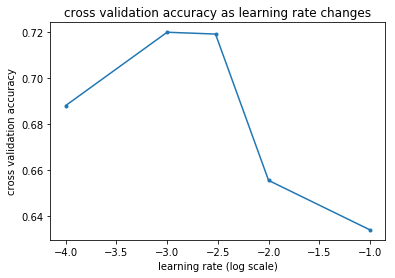

In [34]:
# Vector of learning rates to explore
lr_vec = [.0001, .001, 0.003, 0.01, 0.1]

# Vector to record Cross validation accuracies
cv_acc = []

# For each learning rate
for lr in lr_vec:
    
    # Initialize weights
    w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T
    
    # Create LR model, perform cross validation and update Cross validation vector
    reg = LogisticRegression(w)
    cv_acc.append(cross_validation(reg, 5, x_train, y_train, lr, 20, 0.0001))
    
# Plot log scale of Cross validation accuracies
plt.plot(np.log10(lr_vec), cv_acc, '.-')
plt.title('cross validation accuracy as learning rate changes')
plt.xlabel('learning rate (log scale)')
plt.ylabel('cross validation accuracy')

###  Experiment 2: Compare the runtime and accuracy of LDA and logistic regression

In [35]:
import time
start_time = time.time()

# Execute Cross validation 5 times on LR
for i in range(5):
    w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T
    reg = LogisticRegression(w)
    Acc=cross_validation(reg, 5, x_train, y_train, lr, 20, 0.0001)

print('Time to run logistic regression 5 times: {} seconds'.format(time.time()-start_time))
print('The average accuracy after k-fold cross validation is {} %'.format(Acc*100))
print("\n")
# Reset start time
start_time = time.time()

# Execute Cross validation 5 times on LDA
for i in range(5):
    reg = LDA()
    ACC=cross_validation(reg, 5, x_train, y_train)

print('Time to run LDA 5 times: {} seconds'.format(time.time()-start_time))
print('The average accuracy after k-fold cross validation is {} %'.format(ACC*100))

Time to run logistic regression 5 times: 0.1421527862548828 seconds
The average accuracy after k-fold cross validation is 62.85183377163284 %


Time to run LDA 5 times: 1.183812141418457 seconds
The average accuracy after k-fold cross validation is 73.66581106404422 %


### Experiment 3:  For the wine dataset, find a new subset of features and/or additional features that improve the accuracy

In [44]:
# Introducing interaction terms
data['densityalcohol'] = data['density']*data['alcohol']
data['pHalcohol'] = data['pH']*data['alcohol']
data['sulphatesalcohol'] = data['sulphates']*data['alcohol']
data['totalsulfurdioxidevolatileacidity'] = data['total sulfur dioxide']*data['volatile acidity']
data['densityvolatileacidity'] = data['density']*data['volatile acidity']
data['pHvolatileacidity'] = data['pH']*data['volatile acidity']

fixed acidity                        0.095608
volatile acidity                    -0.313304
citric acid                          0.152509
residual sugar                      -0.002028
chlorides                           -0.101997
free sulfur dioxide                 -0.063396
total sulfur dioxide                -0.235628
density                             -0.151687
pH                                   0.003572
sulphates                            0.211075
alcohol                              0.428939
densityalcohol                       0.429986
pHalcohol                            0.360335
sulphatesalcohol                     0.350118
totalsulfurdioxidevolatileacidity   -0.312530
densityvolatileacidity              -0.314083
pHvolatileacidity                   -0.297170
Name: quality, dtype: float64


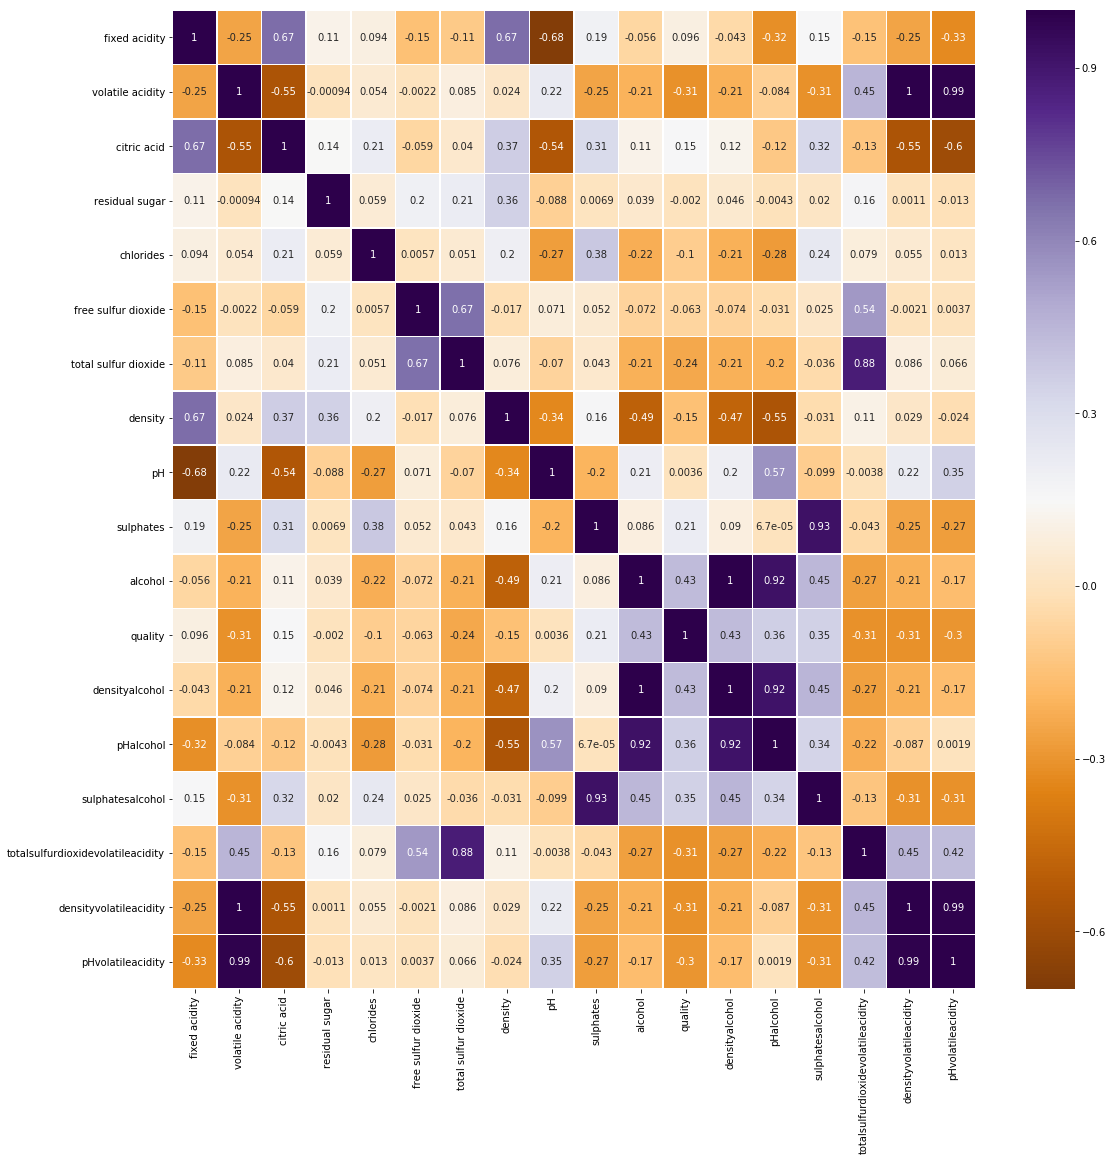

In [45]:
# Correlations of all features w.r.t quality
correlation = data.corr() 
plt.figure(figsize=(18, 18)) 
print(data.corr()['quality'].drop('quality')) 
heatmap = sns.heatmap(correlation, annot=True, linewidths=0.5, linecolor="white",vmin=-0.7, cmap="PuOr")

In [46]:
# Correlations of features with quality (target variable) 
correlations = data.corr()['quality'].drop('quality')

# Get features with correlations higher than the threshold specified
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

# taking features with correlation more than 0.05 as input x and quality as target variable y
features = get_features(0.05)

print("Features with correlations higher than 0.05: ")
print(features)

# Data with new and selected features
data_new_features = data[features + ['quality']]
data=data_new_features

Features with correlations higher than 0.05: 
['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'densityalcohol', 'pHalcohol', 'sulphatesalcohol', 'totalsulfurdioxidevolatileacidity', 'densityvolatileacidity', 'pHvolatileacidity']


In [47]:
# Train Test split

# Select 80% for training
data_train = data.sample(frac = 0.8)
x_train = np.array(data_train.iloc[:, :-1])
y_train = np.array(data_train["quality"])

# Select rest of data for testing
data_test = data.drop(data_train.index)
x_test = np.array(data_test.iloc[:, :-1])
y_test = np.array(data_test["quality"])

# Show number of training and testing data points
print("Number of Training data points: ", len(x_train))
print("Number of Testing data points: ", len(x_test))

Number of Training data points:  1257
Number of Testing data points:  314


In [48]:
import time
start_time = time.time()

for i in range(5):
    w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T
    reg = LogisticRegression(w)
    Acc=cross_validation(reg, 5, x_train, y_train, 0.001, 20, 0.0001)

print('Time to run logistic regression 5 times: {} seconds'.format(time.time()-start_time))
print('The average accuracy after k-fold cross validation is {} %'.format(Acc*100))
print("\n")
start_time = time.time()
for i in range(5):
    reg = LDA()
    ACC=cross_validation(reg, 5, x_train, y_train)

print('Time to run LDA 5 times: {} seconds'.format(time.time()-start_time))
print('The average accuracy after k-fold cross validation is {} %'.format(ACC*100))

Time to run logistic regression 5 times: 0.1661081314086914 seconds
The average accuracy after k-fold cross validation is 69.6924554745445 %


Time to run LDA 5 times: 1.2899086475372314 seconds
The average accuracy after k-fold cross validation is 72.63247405634378 %


### Results on Test dataset - After feature engineering

In [49]:
# Results of LDA on Test dataset
w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T
lda = LDA()
f = lda.fit(x_train,y_train)
y_pred = lda.predict(x_test)
lda_new_features = evaluate_acc(y_test, y_pred)*100
print("Accuracy of LDA on Test dataset with new features: ", lda_new_features, "%")

Accuracy of LDA on Test dataset with new features:  76.75159235668791 %


In [50]:
# Results of LR on Test dataset
w = np.array(0.1*np.random.rand(x_train.shape[1]))[np.newaxis].T
reg = LogisticRegression(w)
f = reg.fit(x_train,y_train,0.001,200, 0.0001)
y_pred = reg.predict(x_test)
lr_new_features = evaluate_acc(y_test, y_pred)*100
print("Accuracy of LR on Test dataset with new features: ", lr_new_features, "%")

Accuracy of LR on Test dataset with new features:  73.56687898089172 %


# Results summary

In [51]:
print("Accuracies on Test dataset: ")
print("Logistic Regression")
print("\tWith initial features:", lr_init_features, "%")
print("\tWith additional features:", lr_new_features, "%")
print("Linear Discriminant Analysis")
print("\tWith initial features:", lda_init_features, "%")
print("\tWith additional features:", lda_new_features, "%")

Accuracies on Test dataset: 
Logistic Regression
	With initial features: 67.51592356687898 %
	With additional features: 73.56687898089172 %
Linear Discriminant Analysis
	With initial features: 72.29299363057325 %
	With additional features: 76.75159235668791 %
